# Diamond Dataset Exploration

This notebook explores the diamond image dataset structure and visualizes sample images from different shape categories.

In [1]:
# Import required libraries
import sys
sys.path.append('..')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os

from src.data.loader import DiamondDataLoader, DiamondShapeMapper
from src.utils.visualization import create_comparison_grid

%matplotlib inline

## 1. Dataset Configuration

In [2]:
# Configure dataset path
VARIANT = 'Shape_1d_256i'  # Options: Shape_1d_256i, Shape_5d_256i, Shape_10d_256i

# Initialize data loader
loader = DiamondDataLoader(VARIANT)
mapper = DiamondShapeMapper()

print(f"Dataset variant: {VARIANT}")
print(f"Dataset path: {loader.dataset_path}")

Dataset variant: Shape_1d_256i
Dataset path: /Users/rushirbhavsar/Main/code/git-commits/diamond-shape-segmentation/notebooks/../src/data/raw/Shape_1d_256i


## 2. Dataset Information

In [3]:
# Get dataset information
dataset_info = loader.get_dataset_info()

print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"Total images: {dataset_info['total_images']}")
print(f"\nShape categories: {len(dataset_info['shapes'])}")
print("\nPer-shape breakdown:")
print("-"*60)

for code, info in dataset_info['shapes'].items():
    print(f"{code:<6} - {info['name']:<20} : {info['image_count']} images")

print("="*60)

DATASET INFORMATION
Total images: 3584

Shape categories: 14

Per-shape breakdown:
------------------------------------------------------------
AS     - Asscher              : 256 images
BR     - Brilliant            : 256 images
CMB    - Combination          : 256 images
EM     - Emerald              : 256 images
HS     - Heart Shape          : 256 images
MQ     - Marquise             : 256 images
OV     - Oval                 : 256 images
PE     - Pear                 : 256 images
PR     - Princess             : 256 images
PS     - Pearshape            : 256 images
RA     - Radiant              : 256 images
RD     - Round                : 256 images
SEM    - Semi                 : 256 images
TRI    - Triangle             : 256 images


## 3. Validate Dataset

In [4]:
# Validate dataset structure
is_valid, issues = loader.validate_dataset()

if is_valid:
    print("Dataset validation passed!")
else:
    print("Dataset validation failed:")
    for issue in issues:
        print(f"  - {issue}")

Dataset validation passed!


## 4. Visualize Sample Images

In [5]:
def display_shape_samples(shape_id, num_samples=5):
    """
    Display sample images from a shape category.
    """
    shape_code = mapper.get_shape_code(shape_id)
    shape_name = mapper.get_shape_name(shape_code)
    
    # Get image list
    images = loader.list_images(shape_id)
    
    # Load sample images
    samples = []
    for i in range(min(num_samples, len(images))):
        img_path = loader.get_image_path(shape_id, images[i])
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        samples.append(img_rgb)
    
    # Display
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    fig.suptitle(f"{shape_name} ({shape_code}) - Sample Images", fontsize=14, fontweight='bold')
    
    for idx, (ax, img) in enumerate(zip(axes, samples)):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Image {idx+1}")
    
    plt.tight_layout()
    plt.show()

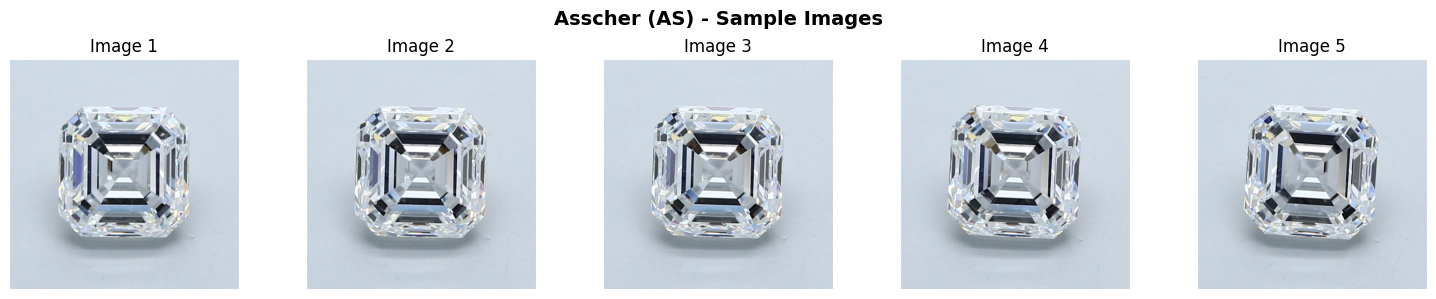

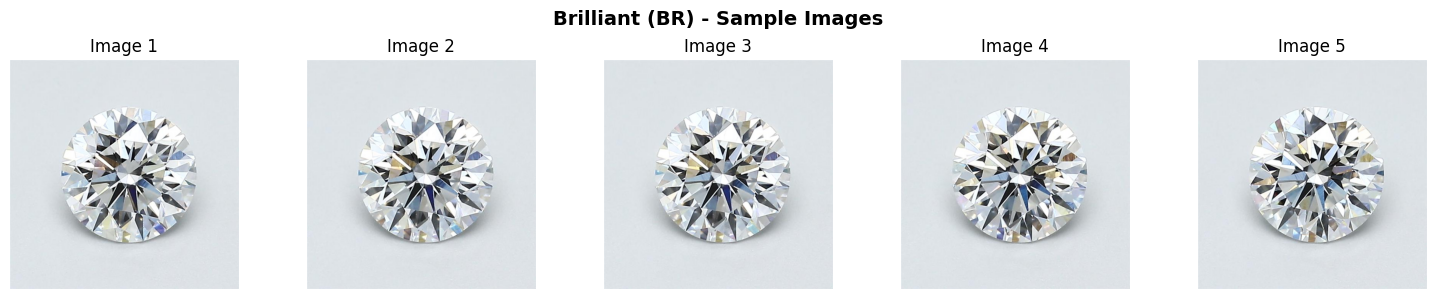

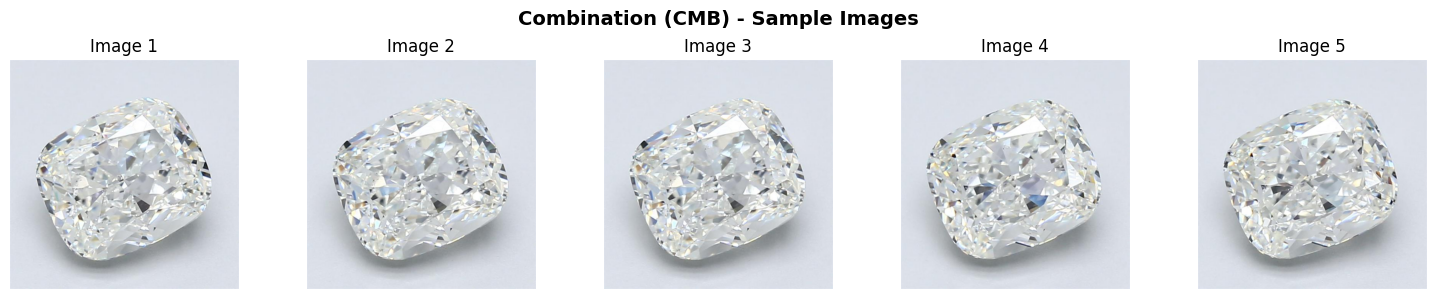

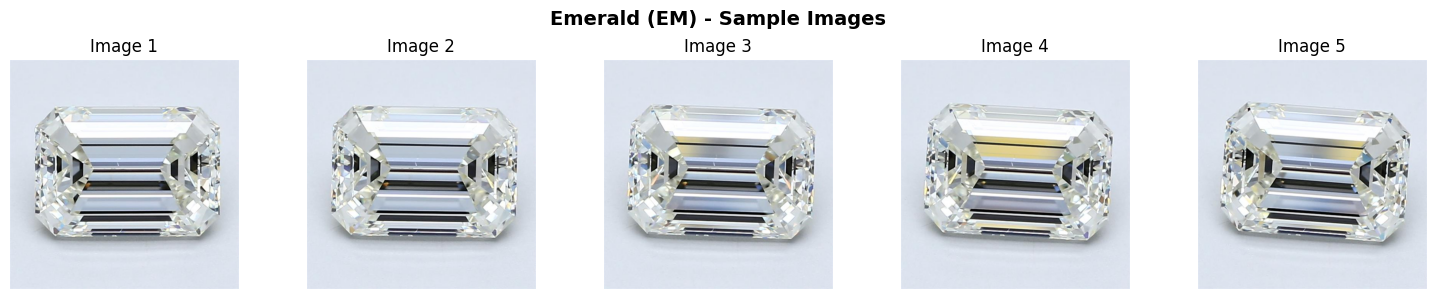

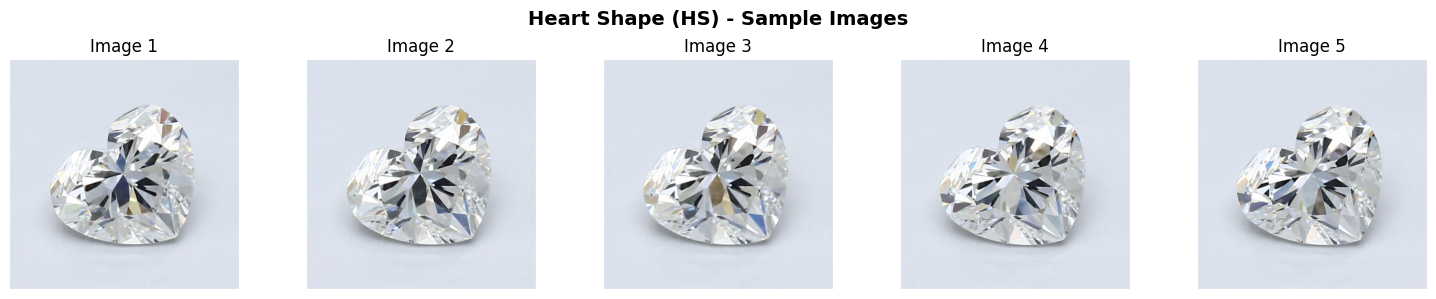

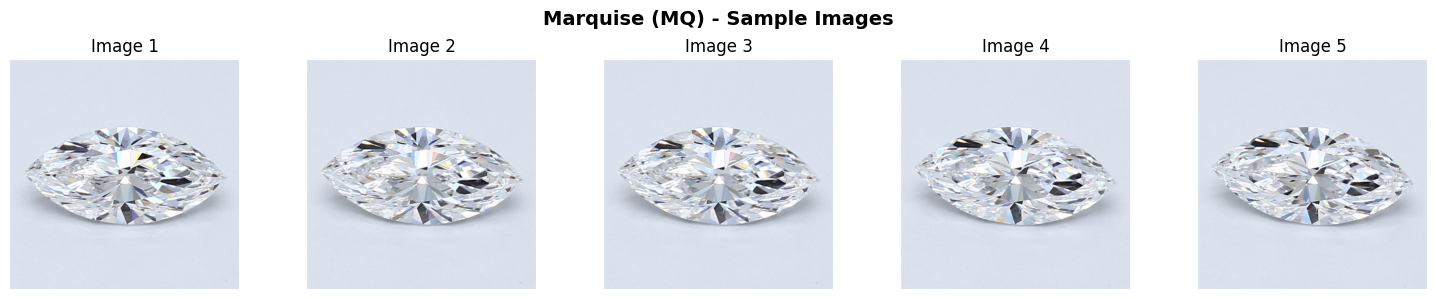

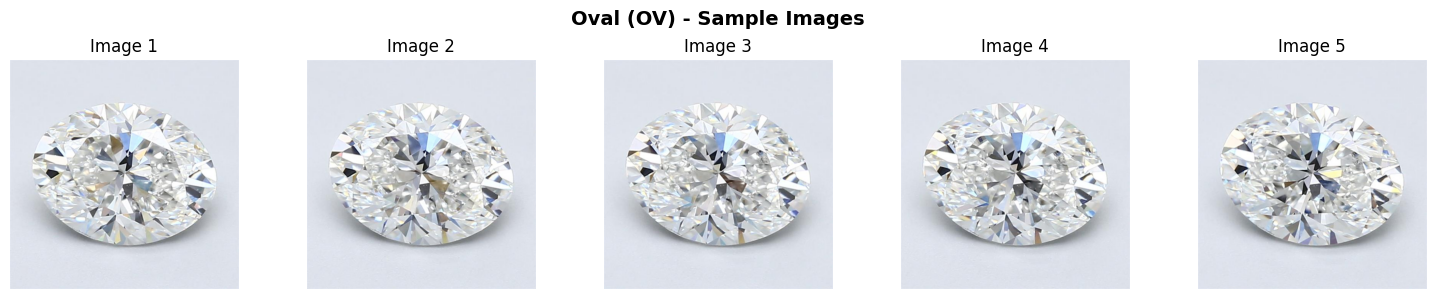

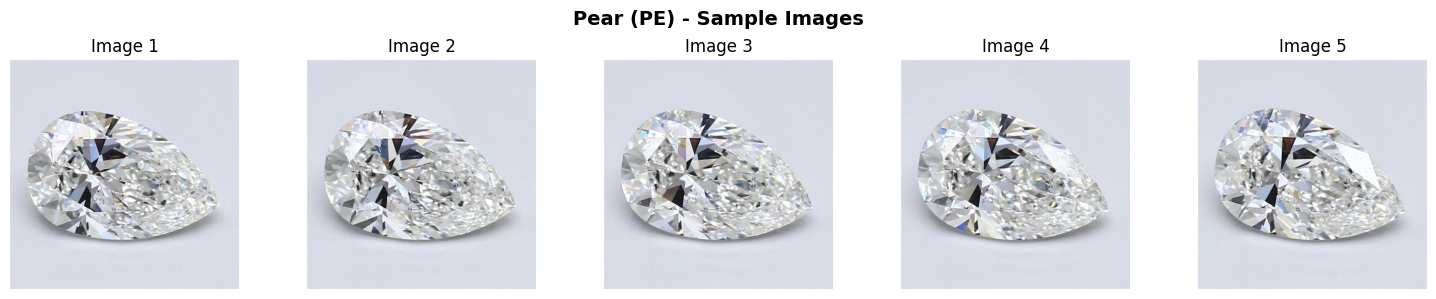

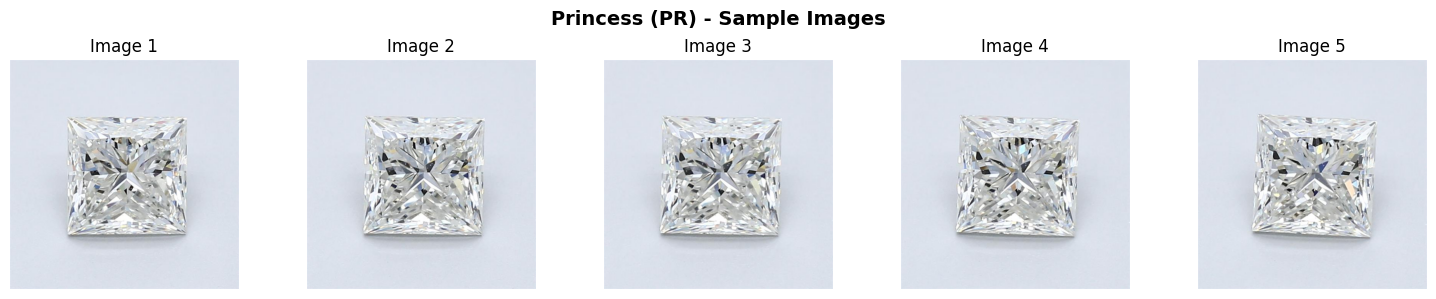

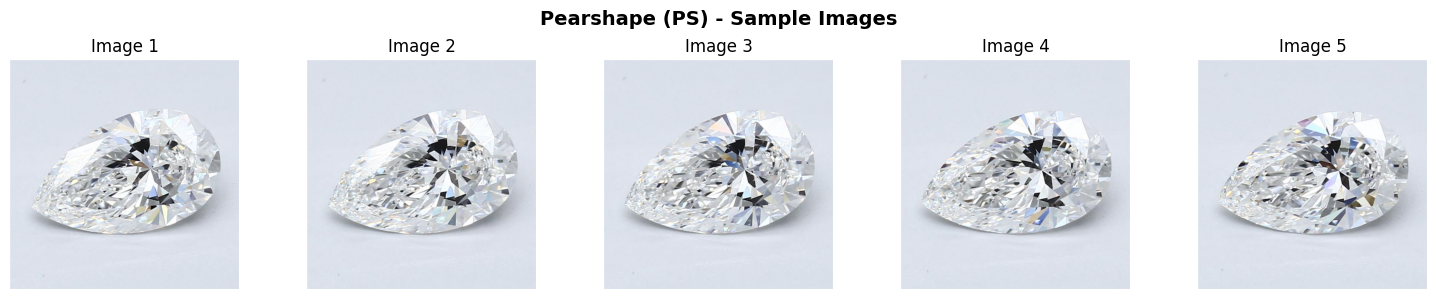

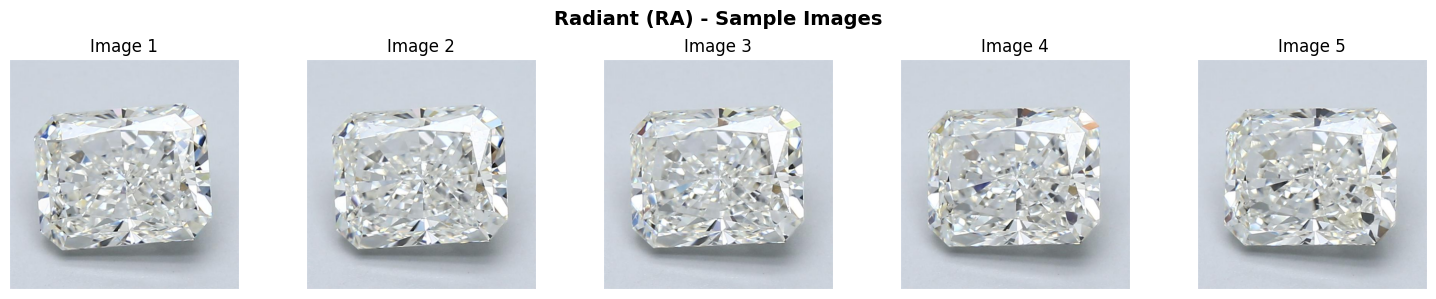

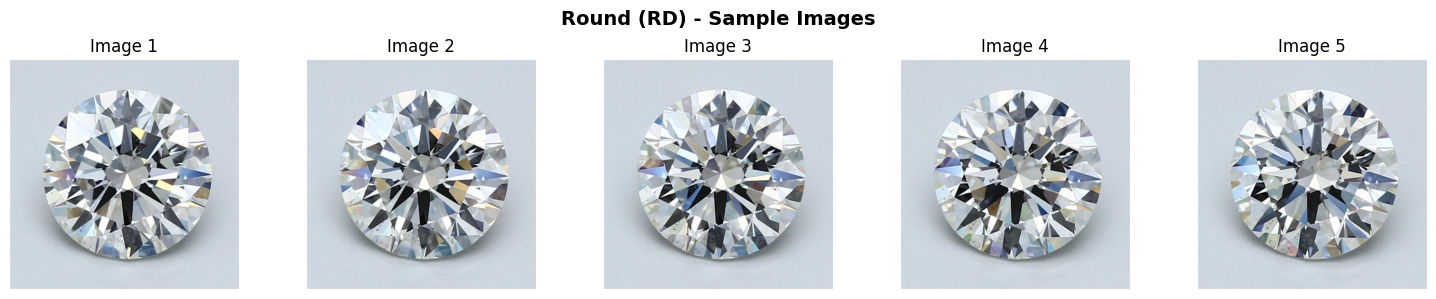

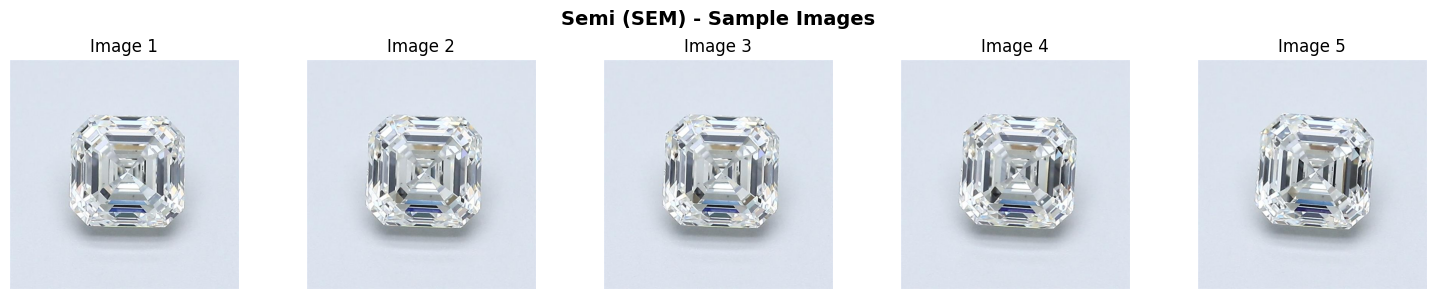

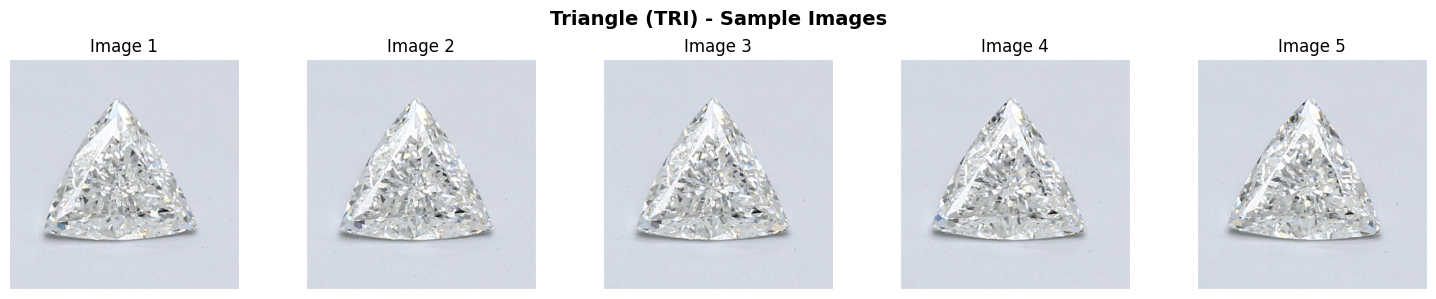

In [6]:
# Display samples from each shape category
for shape_id in range(1, 15):
    display_shape_samples(shape_id, num_samples=5)

## 5. All Shapes Grid View

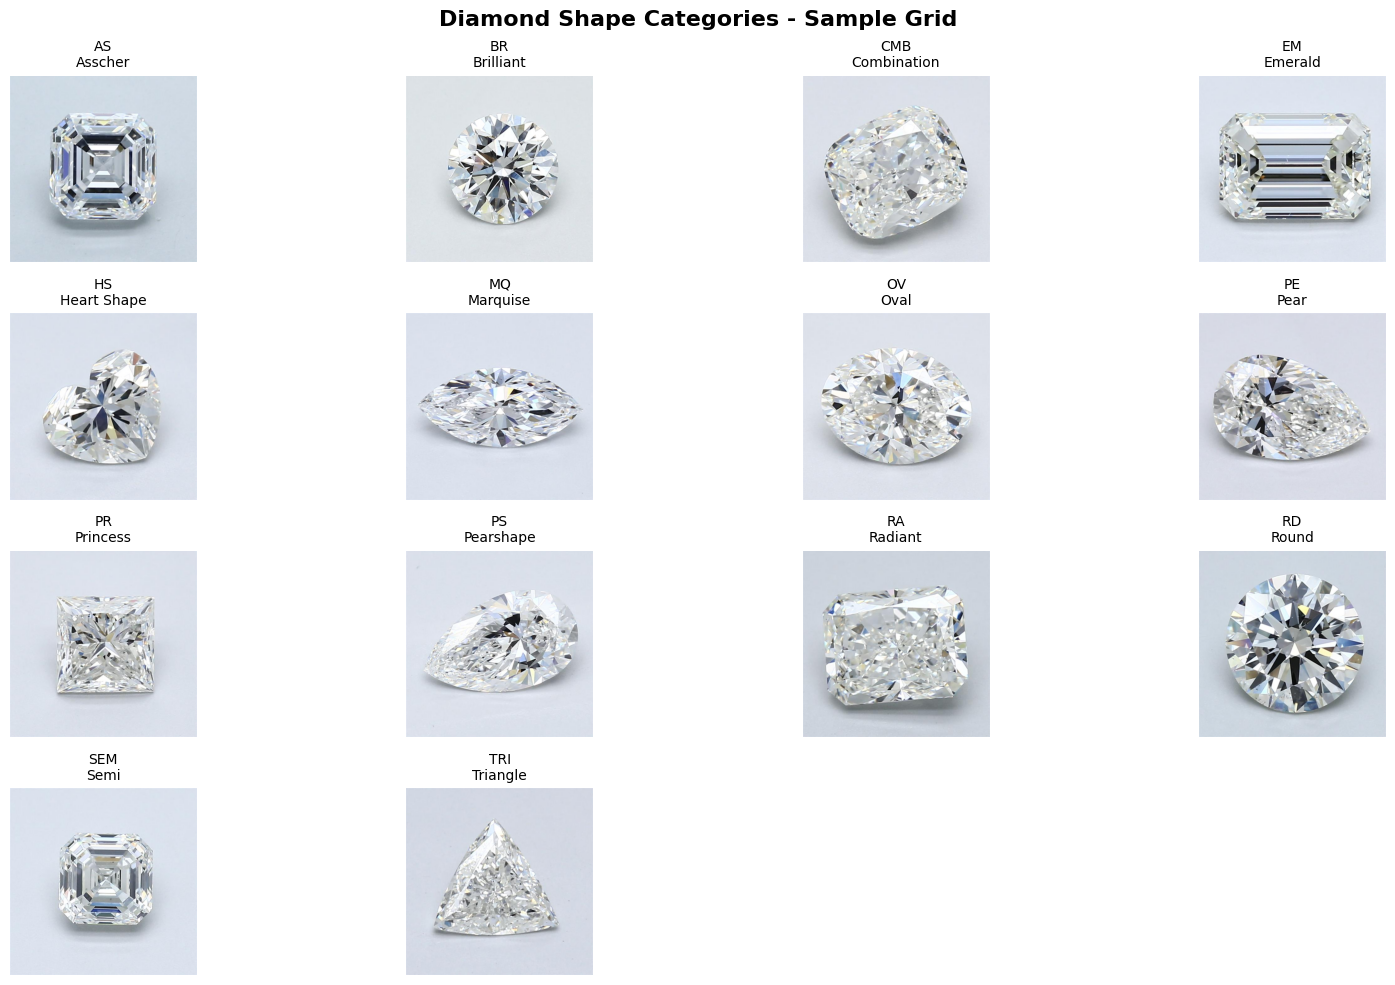

In [7]:
def create_all_shapes_grid():
    """
    Create a grid showing one sample from each shape category.
    """
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Diamond Shape Categories - Sample Grid', fontsize=16, fontweight='bold')
    
    # Create 4x4 grid (14 shapes + 2 empty)
    rows, cols = 4, 4
    
    for shape_id in range(1, 15):
        shape_code = mapper.get_shape_code(shape_id)
        shape_name = mapper.get_shape_name(shape_code)
        
        # Load first image
        images = loader.list_images(shape_id)
        if images:
            img_path = loader.get_image_path(shape_id, images[0])
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Add to grid
            ax = plt.subplot(rows, cols, shape_id)
            ax.imshow(img_rgb)
            ax.axis('off')
            ax.set_title(f"{shape_code}\n{shape_name}", fontsize=10)
    
    plt.tight_layout()
    plt.show()

create_all_shapes_grid()

## 6. Image Properties Analysis

In [8]:
def analyze_image_properties(shape_id, num_samples=10):
    """
    Analyze properties of sample images from a shape category.
    """
    images = loader.list_images(shape_id)
    
    dimensions = []
    mean_brightness = []
    
    for i in range(min(num_samples, len(images))):
        img_path = loader.get_image_path(shape_id, images[i])
        img = cv2.imread(img_path)
        
        if img is not None:
            dimensions.append(img.shape[:2])
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            mean_brightness.append(np.mean(gray))
    
    shape_code = mapper.get_shape_code(shape_id)
    shape_name = mapper.get_shape_name(shape_code)
    
    print(f"\nAnalysis for {shape_name} ({shape_code}):")
    print("-" * 50)
    print(f"Sample size: {len(dimensions)} images")
    print(f"Image dimensions: {dimensions[0] if dimensions else 'N/A'}")
    print(f"Average brightness: {np.mean(mean_brightness):.2f}")
    print(f"Brightness range: [{np.min(mean_brightness):.2f}, {np.max(mean_brightness):.2f}]")

# Analyze first 3 shape categories
for shape_id in range(1, 4):
    analyze_image_properties(shape_id)


Analysis for Asscher (AS):
--------------------------------------------------
Sample size: 10 images
Image dimensions: (600, 599)
Average brightness: 196.15
Brightness range: [194.76, 201.50]

Analysis for Brilliant (BR):
--------------------------------------------------
Sample size: 10 images
Image dimensions: (600, 599)
Average brightness: 212.80
Brightness range: [210.93, 215.95]

Analysis for Combination (CMB):
--------------------------------------------------
Sample size: 10 images
Image dimensions: (600, 599)
Average brightness: 209.50
Brightness range: [209.30, 209.83]


## 7. Color Distribution Analysis

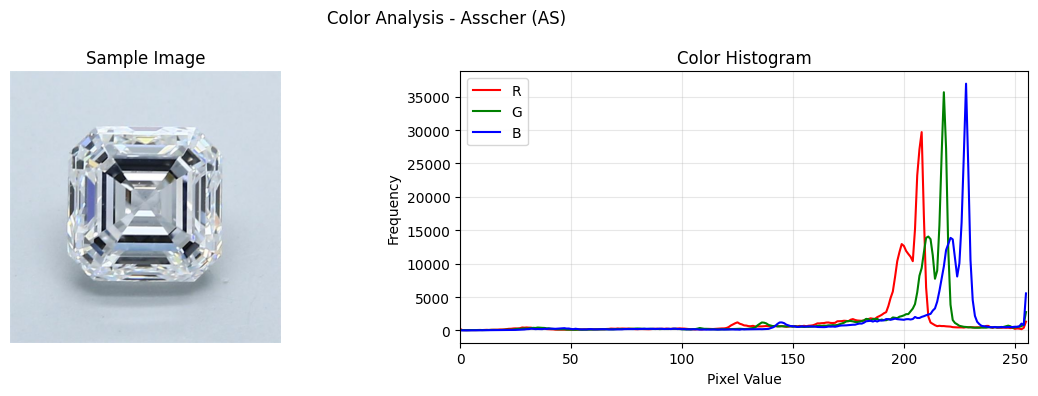

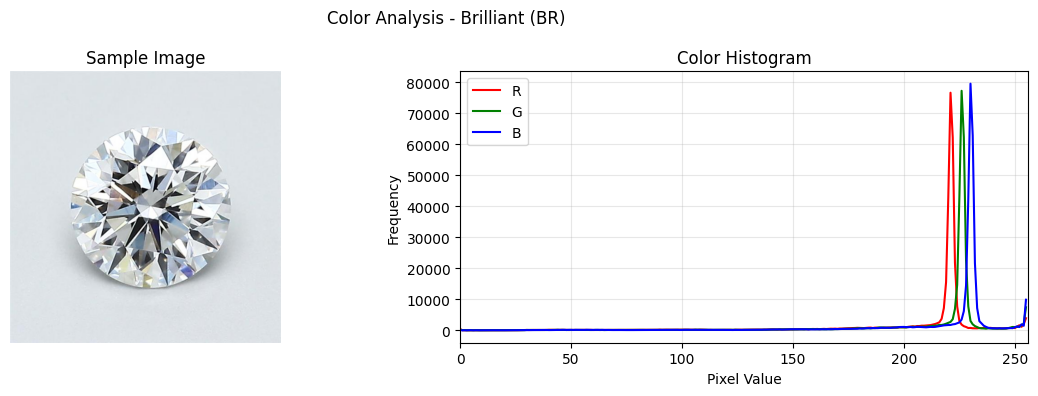

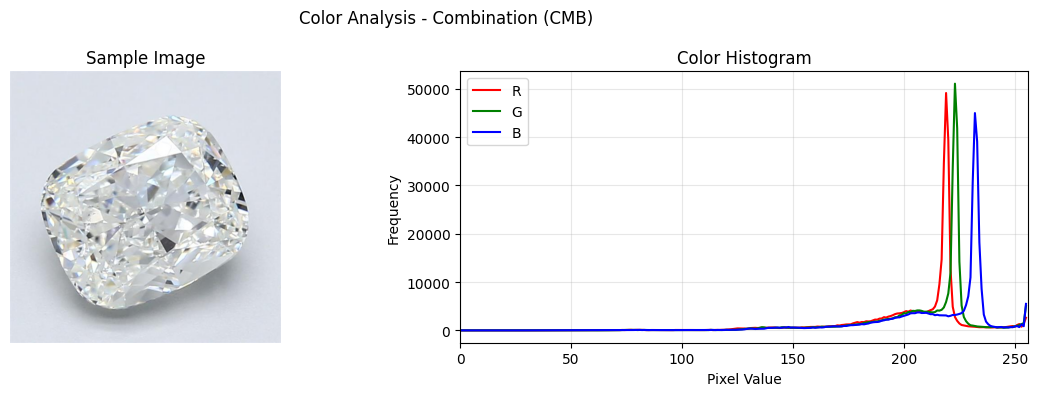

In [9]:
def plot_color_histogram(shape_id):
    """
    Plot color histogram for a sample image.
    """
    images = loader.list_images(shape_id)
    img_path = loader.get_image_path(shape_id, images[0])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    shape_code = mapper.get_shape_code(shape_id)
    shape_name = mapper.get_shape_name(shape_code)
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Color Analysis - {shape_name} ({shape_code})")
    
    # Display image
    axes[0].imshow(img_rgb)
    axes[0].axis('off')
    axes[0].set_title('Sample Image')
    
    # Plot histogram
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        axes[1].plot(hist, color=color, label=color.upper())
    
    axes[1].set_xlim([0, 256])
    axes[1].set_title('Color Histogram')
    axes[1].set_xlabel('Pixel Value')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot for first 3 shapes
for shape_id in range(1, 4):
    plot_color_histogram(shape_id)

## 8. Summary Statistics

In [10]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Dataset Variant: {VARIANT}")
print(f"Total Shape Categories: {mapper.get_shape_count()}")
print(f"Total Images: {dataset_info['total_images']}")
print(f"Images per Shape: ~{dataset_info['total_images'] // mapper.get_shape_count()}")
print(f"Image Resolution: 256x256 pixels")
print(f"Image Format: PNG")
print("="*60)

DATASET SUMMARY
Dataset Variant: Shape_1d_256i
Total Shape Categories: 14
Total Images: 3584
Images per Shape: ~256
Image Resolution: 256x256 pixels
Image Format: PNG


## Conclusion

This notebook explored the diamond image dataset structure and visualized samples from different shape categories. Key findings:

- The dataset contains 14 distinct diamond shape categories
- Each category has 256 images at 256x256 resolution
- Images show varying lighting conditions and backgrounds
- The dataset is well-organized and ready for segmentation processing